# Essentials of Machine Learning in Python Sample Codes

This is an attempt at making machine learning accessible to everyone by way of explaining and providing sample code for various popular ML algorithms

## Linear Regression

One of the most popular and well understood ML algorithm is linear regression. Engineers do not need an introduction to the algorithm. However, it is important to note the following assumptions of the linear regression algorithm:

- Linear relationship: The algorithm assumes a linear relationship between the x and y variables
- Multivariate normality: The algorithm assumes that the residuals are normally distributed
- No or little multicollinearity: The algorithm assumes that x variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values (1 = not correlated, between 1 and 5 = moderately correlated, greater than 5 = highly correlated)
- No auto-correlation: no correlation of a x variable with delayed copy of itself as a function of delay
- Homoscedasticity: The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.  Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables

In [34]:
# importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Linear Regression\\train.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Linear Regression\\test.csv')

In [36]:
# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


In [37]:
# Now, we need to predict the missing target variable in the test data
# target variable - Item_Outlet_Sales

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

In [38]:
# seperate the independent and target variable on training data
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

In [39]:
model = LinearRegression()

# fit the model with the training data
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)


Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]


In [41]:
# intercept of the model
print('\nIntercept of model',model.intercept_)


Intercept of model -121926.97473298294


In [42]:
# predict the target on the test dataset
predict_train = model.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train)


Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [43]:
# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1135.8159344155242


In [44]:
# predict the target on the testing dataset
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 


Item_Outlet_Sales on test data [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.4756877    129.4629475   4259.8975191   3732.152259

In [45]:
# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209691


In [49]:
r2_score(test_y, predict_test,multioutput='variance_weighted')

0.5591989970389899

The Root Mease Squared Error (RMSE) is an absolute measure of the variance of the prediction against the y variable. This is in the same units as the y variables and how big a difference is acceptable depends on the variable itself and can be set from case to case. The ".score" methods in model gives us the RSquared which is a relative measure of fit and explains what percentage of the data is represented by the model

##  Logistic Regression

Despite the name, logistic regression is not a continuous variable prediction tool. Logistic regression is used to predict discrete variables such as categorical data (Binary 1/0, yes/no, true/false).

In logistic regression we are plotting for the logit function. The logit function is log of odds modelled as a linear combination of the x variables.

In [50]:
# importing required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Logistic Regression\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Logistic Regression\\test-data.csv')

In [52]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [53]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [54]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [55]:
model = LogisticRegression()

# fit the model with the training data
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# coefficeints of the trained model
print('Coefficient of model :', model.coef_)

Coefficient of model : [[-0.03092771  0.0015481   0.89622694  0.06137515 -1.00592978  1.25420002
  -1.30252771  1.05848096  0.98967085  0.74258026 -1.03750874 -0.76764135
  -0.42457863 -0.60933104  0.31409759  0.69532869  0.09004309  0.30114468
  -0.69551043 -0.44316246 -0.31026885  0.16940167  0.15518104 -0.3729104 ]]


In [58]:
# intercept of the model
print('Intercept of model',model.intercept_)

Intercept of model [-0.04832769]


In [59]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0

In [60]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8089887640449438


In [61]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

Target on test data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1]


In [62]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8212290502793296


## Decision Tree

Decision tree is a very useful algorithm and is used very often. Although it is mostly used for classification problems, it can be used for both categorical and continuous dependent variables. In the example below we will split the population into 2 or more homogneous sets using the independent variables.

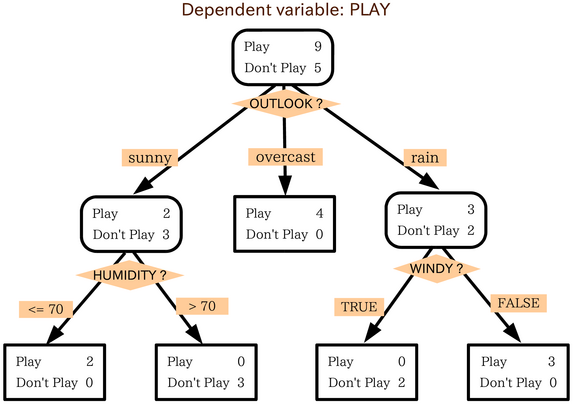

In [67]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "Decision_tree_model.png")

In the image above, you can see that population is classified into four different groups based on multiple attributes to identify ‘if they will play or not’. To split the population into different heterogeneous groups, it uses various techniques like Gini, Information Gain, Chi-square, entropy.

In [68]:
# importing required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [69]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Decision Tree\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Decision Tree\\test-data.csv')

In [70]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [71]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [72]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [78]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# depth of the decision tree
print('Depth of the Decision Tree :', model.node_count)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'node_count'

In [82]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0

In [83]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9859550561797753


In [84]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

Target on test data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0]


In [85]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.770949720670391


In [1]:
'''from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=test_x.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))'''

"from sklearn.tree import DecisionTreeClassifier, export_graphviz\nfrom sklearn import tree\nfrom IPython.display import SVG\nfrom graphviz import Source\nfrom IPython.display import display\n\ngraph = Source(tree.export_graphviz(model, out_file=None\n   , feature_names=test_x.columns, class_names=['0', '1'] \n   , filled = True))\ndisplay(SVG(graph.pipe(format='svg')))"

## Support Vector Machines (SVM)

Support Vector Machines (SVM) is a classification algorithm. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [2]:
# importing required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\SVM\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\SVM\\test-data.csv')

In [4]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [5]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [6]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [7]:
model = SVC()

# fit the model with the training data
model.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train)

Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0

In [9]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8497191011235955


In [10]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0]


In [11]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7206703910614525


## Naive Bayes

Naive Bayes is a classification algorithm based on Bayes theorem. In probability theory and statistics, Bayes’ theorem (alternatively Bayes’ law or Bayes’ rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes’ theorem, a person's age can be used to more accurately assess the probability that he has cancer than can be done without knowledge of the person’s age.

In [12]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [13]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Naive Bayes\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Naive Bayes\\test-data.csv')

In [14]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [15]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [16]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [17]:
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

GaussianNB(priors=None)

In [18]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1

In [19]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.44803370786516855


In [20]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.35195530726256985


## K-Nearest Neighbours (KNN)

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, choosing K turns out to be a challenge while performing kNN modeling.

In [22]:
# importing required libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\KNN\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\KNN\\test-data.csv')

In [24]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [25]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [26]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [27]:
model = KNeighborsClassifier()  

# fit the model with the training data
model.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
# Number of Neighbors used to predict the target
print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)


The number of neighbors used to predict the target :  5


In [29]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 


Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 

In [30]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8047752808988764


In [31]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0]


In [32]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7150837988826816


## K-Means

It is a type of unsupervised algorithm which solves the clustering problem. Its procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.

How K-means forms cluster:

- K-means picks k number of points for each cluster known as centroids.
- Each data point forms a cluster with the closest centroids i.e. k clusters.
- Finds the centroid of each cluster based on existing cluster members. Here we have new centroids.
- As we have new centroids, repeat step 2 and 3. Find the closest distance for each data point from new centroids and get associated with new k-clusters. Repeat this process until convergence occurs i.e. centroids does not change.

How to determine value of K:

In K-means, we have clusters and each cluster has its own centroid. Sum of square of difference between centroid and the data points within a cluster constitutes within sum of square value for that cluster. Also, when the sum of square values for all the clusters are added, it becomes total within sum of square value for the cluster solution.

We know that as the number of cluster increases, this value keeps on decreasing but if you plot the result you may see that the sum of squared distance decreases sharply up to some value of k, and then much more slowly after that. Here, we can find the optimum number of cluster.

In [33]:
# importing required libraries
import pandas as pd
from sklearn.cluster import KMeans

In [34]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\K-Means\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\K-Means\\test-data.csv')

In [35]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (100, 5)
Shape of testing data : (100, 5)


In [36]:
# Now, we need to divide the training data into differernt clusters
# and predict in which cluster a particular data point belongs.  

model = KMeans()  

# fit the model with the training data
model.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
# Number of Clusters
print('\nDefault number of Clusters : ',model.n_clusters)


Default number of Clusters :  8


In [38]:
# predict the clusters on the train dataset
predict_train = model.predict(train_data)
print('\nCLusters on train data',predict_train)


CLusters on train data [0 5 4 5 0 6 6 3 5 2 3 3 1 4 3 3 4 7 6 0 7 1 1 4 7 4 3 3 4 1 7 1 1 4 4 3 2
 3 2 1 4 2 3 3 4 1 1 4 5 3 1 4 6 3 4 3 6 2 0 7 1 0 6 4 1 4 7 1 1 3 6 3 0 6
 5 5 0 1 6 1 6 1 3 6 2 6 4 1 2 1 7 5 3 4 3 6 1 0 3 0]


In [39]:
# predict the target on the test dataset
predict_test = model.predict(test_data)
print('Clusters on test data',predict_test) 

Clusters on test data [1 0 2 4 6 0 4 1 6 7 1 7 6 6 6 1 1 6 6 5 4 4 6 6 1 6 4 0 6 4 3 0 1 6 0 4 3
 3 1 4 4 0 2 4 6 1 6 5 1 1 7 0 1 3 0 1 3 1 1 2 1 1 6 3 5 6 3 6 1 1 6 2 4 3
 6 4 1 4 1 0 1 6 7 4 2 0 1 6 0 4 0 7 1 6 4 0 0 0 3 4]


In [40]:
# Now, we will train a model with n_cluster = 3
model_n3 = KMeans(n_clusters=3)

In [41]:
# fit the model with the training data
model_n3.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
# Number of Clusters
print('\nNumber of Clusters : ',model_n3.n_clusters)


Number of Clusters :  3


In [43]:
# predict the clusters on the train dataset
predict_train_3 = model_n3.predict(train_data)
print('\nCLusters on train data',predict_train_3) 


CLusters on train data [1 2 0 2 1 0 1 2 2 1 2 2 1 0 2 2 0 1 1 1 1 1 1 0 1 0 2 2 0 1 1 1 1 0 0 2 1
 2 1 1 0 1 2 2 0 1 1 0 2 2 1 0 1 2 0 2 1 1 1 1 1 1 1 0 1 0 1 1 1 2 0 2 1 1
 2 2 2 1 2 1 1 1 2 1 1 1 0 1 1 1 1 2 2 0 2 1 1 1 2 1]


In [44]:
# predict the target on the test dataset
predict_test_3 = model_n3.predict(test_data)
print('Clusters on test data',predict_test_3) 

Clusters on test data [1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 2 0 0 1 1 1 1 0 1 1 0 2 1 1 1 1 0 2
 2 1 0 0 1 1 0 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 0 2
 1 0 1 0 1 2 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 2 0]


## Random Forest

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Each tree is planted & grown as follows:

- If the number of cases in the training set is N, then sample of N cases is taken at random but with replacement. This sample will be the training set for growing the tree.
- If there are M input variables, a number m<<M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
- Each tree is grown to the largest extent possible. There is no pruning.

In [46]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
from sklearn.metrics import accuracy_score

In [47]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Random Forest\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\Random Forest\\test-data.csv')

In [48]:
# view the top 3 rows of the dataset
print(train_data.head(3))

   Survived        Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  28.500000   7.2292         0         0         1           0   
1         1  27.000000  10.5000         0         1         0           1   
2         1  29.699118  16.1000         0         0         1           1   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        1        0  ...        1        0        0        0   
1         0        1        0  ...        1        0        0        0   
2         0        0        1  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0        0           1           0           0  
1        0        0        0           0           0           1  
2        0        0        0           0           0           1  

[3 rows x 25 columns]


In [49]:
# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (712, 25)

Shape of testing data : (179, 25)


In [50]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [51]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [58]:
model = RandomForestClassifier(n_estimators = 500)

# fit the model with the training data
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# number of trees used
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  500


In [60]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train)


Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 

In [61]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9859550561797753


In [62]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 


Target on test data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]


In [63]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.8044692737430168


## Dimensionality Reduction

Dimensionality reduction is a combination of methods used for reducing the number of variables by way of taking components that best represent the vector space without causing undue loss of information.

Principal Component Analysis (PCA) is one such method. This is one of the most popular methods in energy sector due to the large number of variables that affect the dependent variable in energy sector.

In [64]:
# importing required libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [65]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\PCA\\train.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\PCA\\test.csv')

In [66]:
# view the top 3 rows of the dataset
print(train_data.head(3))

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     6.800000         0.037490   48.6034                       2004   
1    15.600000         0.172597  114.8518                       1997   
2    12.911575         0.054721  107.8254                       1985   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0           291.6204                    0                         1   
1          2163.1842                    0                         1   
2          2387.5588                    0                         1   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0                     0   
1                         0                         0                     0   
2                         0                         0                     0   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...                 0                  

In [67]:
# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


In [68]:
# seperate the independent and target variable on training data
# target variable - Item_Outlet_Sales
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

In [69]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

In [70]:
print('\nTraining model with {} dimensions.'.format(train_x.shape[1]))


Training model with 35 dimensions.


In [71]:
# create object of model
model = LinearRegression()

# fit the model with the training data
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# predict the target on the train dataset
predict_train = model.predict(train_x)

In [73]:
# Accuray Score on train dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1135.8159344155242


In [74]:
# predict the target on the test dataset
predict_test = model.predict(test_x)

In [75]:
# Accuracy Score on test dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209691


In [76]:
model_pca = PCA(n_components=12)

new_train = model_pca.fit_transform(train_x)
new_test  = model_pca.fit_transform(test_x)

In [77]:
print('\nTraining model with {} dimensions.'.format(new_train.shape[1]))


Training model with 12 dimensions.


In [78]:
# create object of model
model_new = LinearRegression()

# fit the model with the training data
model_new.fit(new_train,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# predict the target on the new train dataset
predict_train_pca = model_new.predict(new_train)

In [80]:
# Accuray Score on train dataset
rmse_train_pca = mean_squared_error(train_y,predict_train_pca)**(0.5)
print('\nRMSE on new train dataset : ', rmse_train_pca)


RMSE on new train dataset :  1160.0027294621416


In [81]:
# predict the target on the new test dataset
predict_test_pca = model_new.predict(new_test)

In [82]:
# Accuracy Score on test dataset
rmse_test_pca = mean_squared_error(test_y,predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', rmse_test_pca)


RMSE on new test dataset :  1014.4287873324836


## Gradient Boosting Algorithms

Gradient boosting is a set of boosting algorithms that can be used when a group of "Weak Learners" can be combined into a strong learner. A "Weak Learner" is one that has a weak correlation with the dependent variable and is only useful in cases where it is slightly better than a random guess. 

In a typical prediction model, we want to find a function F(x) such that y = F(x) and in the process minimise the mean squared error. In cases where there are weak learners, the minimisation of mean squared error does not suffice and the error element is large.

### GBM

In a gradient boosting algorithm, at each stage m, Fm+1(x) = Fm(x) + h(x)=y. The h(x) function is then predicted using h(x) = y-Fm(x). The residuals h(x) for a given model are negative gradients of squared error loss function 1/2(y-F(x))^2.

In [83]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [84]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\GBM\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\GBM\\test-data.csv')

In [85]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [86]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [87]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [88]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [89]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 


Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 

In [90]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9620786516853933


In [91]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 


Target on test data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]


In [92]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.8324022346368715


### XGBoost

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

In [95]:
# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [96]:
# read the train and test dataset
train_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\XGBoost\\train-data.csv')
test_data = pd.read_csv('C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\ML\\Essentials\\XGBoost\\test-data.csv')

In [97]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [98]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [99]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [100]:
model = XGBClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [101]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 


Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.8693820224719101


In [104]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 


Target on test data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [105]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.8212290502793296
